In [190]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
from datetime import datetime, date, timedelta
from matplotlib.pyplot import figure  
import numpy as np
import math

In [191]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url,sep = ';')

In [192]:
df.head(13)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


In [193]:
# Rydder vekk outliers der tidspunkt for faktisk ankomst ikke eksisterer
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(':', np.nan, inplace=True)
df.dropna(subset=['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], inplace=True)

In [194]:
# Rydder vekk outliers der tidspunkt for faktisk avgang ikke eksisterer
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].replace(':', np.nan, inplace=True)
df.dropna(subset=['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], inplace=True)

In [195]:
#Convert date to a datetime object
df['Dato'] = pd.to_datetime(df['Dato'])

In [196]:
#Antar at ledige plasser kan defineres som kapasitet minus passasjerer ombord
df["Ledige Plasser"] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]

In [197]:
MeanLinjenavn = df.groupby(['Linjenavn']).mean()

In [198]:
SampleMeanLinjenavn = MeanLinjenavn.sample(frac = 0.1)
SampleMeanLinjenavn

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ledige Plasser
Linjenavn,,,,
2043,0.000000,70.000000,0.000000,70.000000
251,0.478261,112.000000,3.652174,108.347826
261,0.581395,112.000000,6.860465,105.139535
441,0.400000,81.040000,2.120000,78.920000
451,0.666667,80.000000,3.333333,76.666667
3839,0.000000,103.000000,17.000000,86.000000
3874,0.000000,106.000000,23.333333,82.666667
320,0.465517,105.000000,3.000000,102.000000
380,0.502793,114.564246,7.240223,107.324022


Text(0.5, 1.0, 'Gjennomsnittlig ledige plasser på 15 tilfeldige busslinjer')

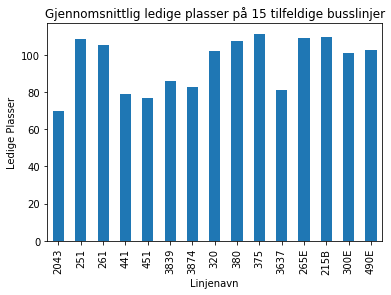

In [199]:
SampleMeanLinjenavn["Ledige Plasser"].plot.bar()
plot.ylabel("Ledige Plasser")
plot.title("Gjennomsnittlig ledige plasser på 15 tilfeldige busslinjer")

In [200]:
#Legger til ukedager til df
df['Ukedag'] = df['Dato'].dt.day_name()

In [201]:

df = df.sort_values('Dato', ascending=True)

<AxesSubplot:title={'center':'Andel busser sortert på område'}, ylabel='Område'>

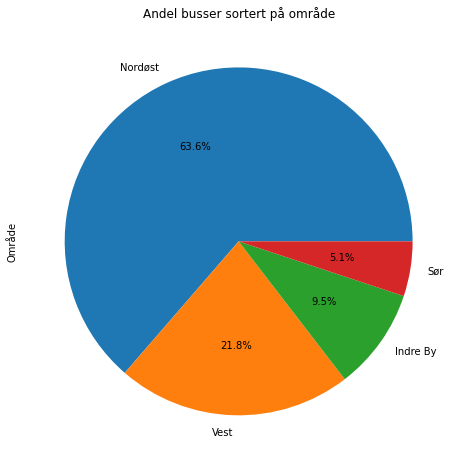

In [202]:
plot.figure(figsize=(16,8)) 
df.Område.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Andel busser sortert på område')

In [203]:
df.sort_values('Holdeplass_Til')

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ledige Plasser,Ukedag
4377,55002-2020-07-21T08:00:00+02:00,2020-07-21,Viken,Nordøst,Rælingen,Logn,Aamodt,Lokal,Viken,350,0,08:06:19,08:06:21,08:04:00,08:04:00,80,-5,85,Tuesday
5081,55005-2020-07-29T19:00:00+02:00,2020-07-29,Viken,Nordøst,Rælingen,Logn,Aamodt,Lokal,Viken,350,0,19:06:19,19:06:47,19:04:00,19:04:00,80,34,46,Wednesday
881,12007-2020-08-21T07:56:00+02:00,2020-08-21,Viken,Nordøst,Rælingen,Aamodt,Aamodttoppen,Lokal,Viken,310,1,08:42:10,08:42:33,08:41:00,08:41:00,72,-18,90,Friday
5810,3702-2020-08-25T06:51:00+02:00,2020-08-25,Oslo,Indre By,Sagene,Bjølsen (mot Sagene),Advokat Dehlis plass (mot Bentsebrua),Lokal,Oslo,37,0,06:55:51,06:56:19,06:55:00,06:55:00,106,0,106,Tuesday
207,3710-2020-08-12T07:15:00+02:00,2020-12-08,Oslo,Indre By,Sagene,Bjølsen (mot Sagene),Advokat Dehlis plass (mot Bentsebrua),Lokal,Oslo,37,0,07:19:39,07:20:07,07:19:00,07:19:00,106,3,103,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,24003-2020-07-31T14:17:00+02:00,2020-07-31,Viken,Vest,Bærum,Nadderud stadion,Øygardveien,Lokal,Viken,220,1,14:20:09,14:20:14,14:18:00,14:18:00,69,0,69,Friday
3984,15054-2020-08-28T06:54:00+02:00,2020-08-28,Viken,Vest,Bærum,Haslum skole,Øygardveien,Ekspress,Viken,150E,0,07:06:56,07:07:18,07:06:00,07:06:00,112,4,108,Friday
3408,15009-2020-08-19T07:55:00+02:00,2020-08-19,Viken,Vest,Bærum,Nadderud stadion,Øygardveien,Lokal,Viken,150,1,08:31:20,08:31:49,08:28:00,08:28:00,112,5,107,Wednesday
4675,15009-2020-07-21T21:18:00+02:00,2020-07-21,Viken,Vest,Bærum,Nadderud stadion,Øygardveien,Lokal,Viken,150,1,21:50:17,21:50:22,21:48:00,21:48:00,112,-9,121,Tuesday


In [204]:
df['Holdeplass_Fra'].nunique()

1622

In [205]:
top_ten = df['Holdeplass_Fra'].value_counts()

<AxesSubplot:title={'center':'Top 10 mest observerte holdeplasser'}>

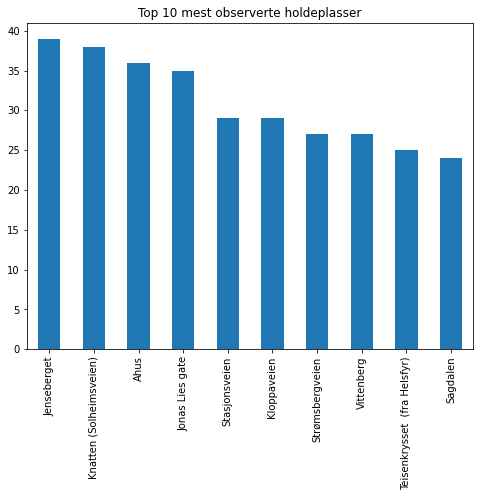

In [206]:
top_ten.head(10).plot(kind='bar', title='Top 10 mest observerte holdeplasser', figsize=(8,6))



<AxesSubplot:title={'center':'Antall buss-observasjoner sortert på Ukedag'}>

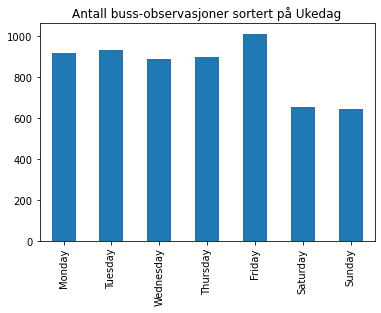

In [207]:
df.Ukedag.value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', title='Antall buss-observasjoner sortert på Ukedag')

<AxesSubplot:title={'center':'Antall buss-observasjoner sortert på Kommune'}>

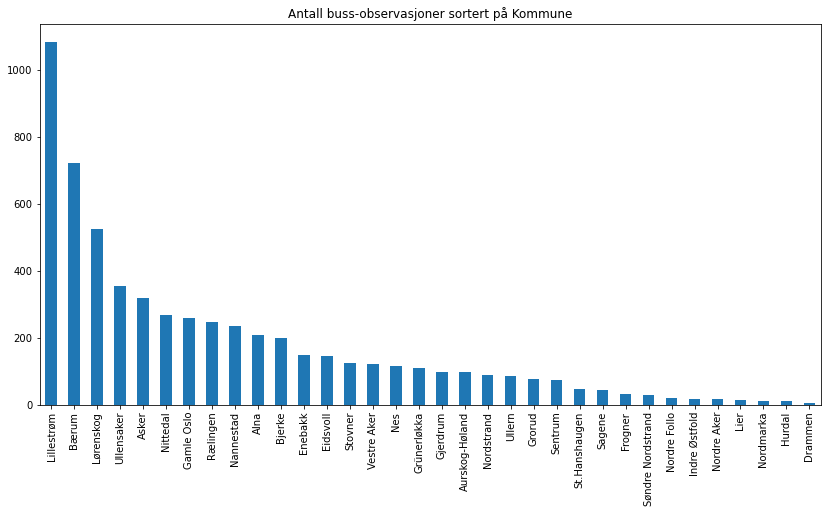

In [208]:
df.Kommune.value_counts().plot(kind='bar', title='Antall buss-observasjoner sortert på Kommune', figsize=(14,7))